## Import

In [66]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm

## Utility functions

## Dataset

In [67]:
# path to the dataset file
dataset_path = os.path.join(os.getcwd(), "cancer_classification.csv")

# dataframe
cancer_df = pd.read_csv(dataset_path)

# shuffle the dataframe
shuffled_df = cancer_df.sample(frac=1, random_state=27)

# features
features = shuffled_df.iloc[:, :-1].values

# labels
labels = shuffled_df.iloc[:, -1].values

# split into train and test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=8)

## Features normalization

In [68]:
# scaler
scaler = StandardScaler()

# fit the scaler on the training set and apply it on training set and test set to normalize data
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

## Logistic regression

In [69]:
# model
model = LogisticRegression()

# train the model
model.fit(features_train, labels_train)

LogisticRegression()

In [70]:
# infere on test data
pred_labels = model.predict(features_test)

# compute accuracy
accuracy = accuracy_score(labels_test, pred_labels)

# print some statistics
print(classification_report(labels_test, pred_labels))
print("Confusion Matrix:")
print(confusion_matrix(labels_test, pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[39  2]
 [ 1 72]]


## Statistics

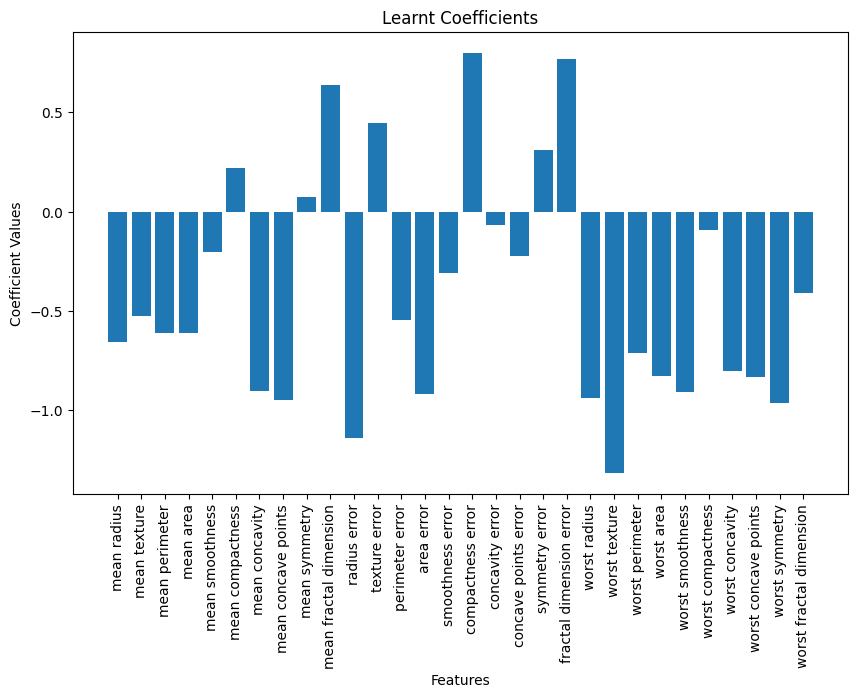

In [71]:
# learnt regression coefficients for the features
coeffs = model.coef_.flatten()

# features names
features_names = shuffled_df.columns[:-1]

# represent graphically the coefficients
plt.figure(figsize=(10, 6))

plt.title('Learnt Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=90)

plt.bar(features_names, coeffs)

plt.show()

## SVM

In [72]:
# SVM model
svm_model = svm.SVC(kernel='linear')

# train the SVM
svm_model.fit(features_train, labels_train)

SVC(kernel='linear')

In [73]:
# infere on test data
pred_labels_svm = model.predict(features_test)

# compute accuracy
accuracy_svm = accuracy_score(labels_test, pred_labels)

# print some statistics
print(classification_report(labels_test, pred_labels_svm))
print("Confusion Matrix:")
print(confusion_matrix(labels_test, pred_labels_svm))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        41
           1       0.97      0.99      0.98        73

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[39  2]
 [ 1 72]]


## Statistics

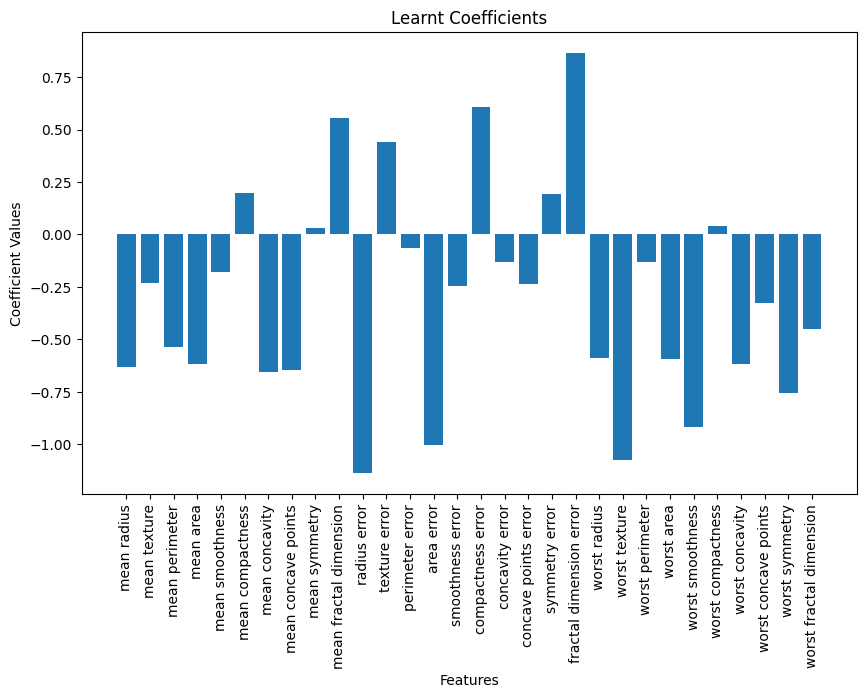

In [74]:
# learnt regression coefficients for the features
coeffs_svm = svm_model.coef_.flatten()

# represent graphically the coefficients
plt.figure(figsize=(10, 6))

plt.title('Learnt Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=90)

plt.bar(features_names, coeffs_svm)

plt.show()